In [1]:
%matplotlib inline
!pip install torchvision==0.12
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import matplotlib.patches as patches
from collections import Counter
import random
import xml.etree.ElementTree as ET
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset,DataLoader
from torch import nn
from PIL import Image
import cv2
import numpy

import sys
import torch.optim as optim
from tqdm.notebook import tqdm
import gc



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_start = "/content/drive/MyDrive/" 


In [4]:
train = pd.read_csv(os.path.join(path_start,"Zindi_signs/Train.csv"))
train.head()

,img_IDS,Label
0,ImageID_33HMDMJ3,Temple
1,ImageID_V5POEX4O,Church
2,ImageID_89CCCCW6,Enough/Satisfied
3,ImageID_GNJXOWX5,Me
4,ImageID_7Q9LOP7R,Love


In [5]:
test = pd.read_csv(os.path.join(path_start,"Zindi_signs/Test.csv"))
test.head()

,img_IDS
0,ImageID_USRB8QNG
1,ImageID_SZ8D1ZJI
2,ImageID_4OJO2F8J
3,ImageID_IEE4XV0B
4,ImageID_BP0O0WZ9


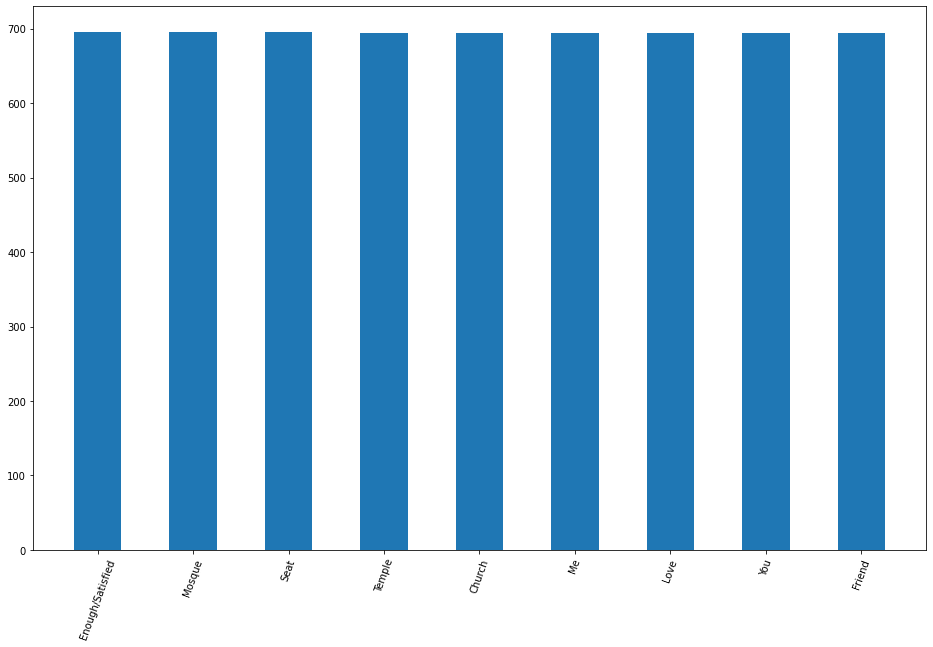

In [6]:
#class distribution
values = train.Label.value_counts().values
labels = train.Label.value_counts().index.values

indexes = np.arange(len(labels))
width = 0.5
plt.figure(figsize = (16,10))
plt.bar(indexes, values, width, align='edge')
plt.xticks(indexes + width * 0.5, labels, rotation=70)
plt.show()

In [7]:
sample_submission = pd.read_csv(os.path.join(path_start, "Zindi_signs/SampleSubmission.csv"))
sample_submission.head()

,img_IDS,Church,Enough/Satisfied,Friend,Love,Me,Mosque,Seat,Temple,You
0,ImageID_USRB8QNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ImageID_SZ8D1ZJI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ImageID_4OJO2F8J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ImageID_IEE4XV0B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ImageID_BP0O0WZ9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
n_classes = len(set(train.Label.values))
labels_dict = {i:el for i,el in enumerate(sample_submission.columns[1:])}
labels_dict_inversed = {el:i for i,el in enumerate(sample_submission.columns[1:])}

In [9]:
path = os.path.join(path_start, "Zindi_signs/Images/Images/")
path_train = os.path.join(path_start, "Zindi_signs/img/train/")
path_test = os.path.join(path_start, "Zindi_signs/img/test/")
paths = [path_train,path_test]

In [10]:
#wrong pics

fl = ['ImageID_H865NRZ4',
 'ImageID_N1FE792X',
 'ImageID_U9P07SMT',
 'ImageID_DAN12R0K',
 'ImageID_G87FKBQ0',
 'ImageID_0RWNBU85',
 'ImageID_BYO9GTY4',
 'ImageID_FEFS5R1Q',
 'ImageID_HEA0X15D',
 'ImageID_L6DF7L4T',
 'ImageID_TUE1CAYK',
 'ImageID_G88I8RLC',
 'ImageID_IRVFEMOI',
 'ImageID_I7JQGR44',
 'ImageID_LW7CYKZL',
 'ImageID_HO26LVWE',
 'ImageID_55HLIS7K',
 'ImageID_KZM9QBI8',
 'ImageID_LU4013XR',
 'ImageID_ZKIRW1K2',
 'ImageID_VJPPH215',
 'ImageID_1JVQDHLV',
 'ImageID_7U2SHOZ3',
 'ImageID_5MCMKNHT',
 'ImageID_K3LSRGHZ',
 'ImageID_0R1JN7AC',
 'ImageID_D4KRNJ7O',
 'ImageID_2SYMFGS5',
 'ImageID_SW0JF9OR',
 'ImageID_CKV4NWZT',
 'ImageID_KH7CLZM8',
 'ImageID_DKH9T5LV',
 'ImageID_EUCH5ZC0',
 'ImageID_SCPSMEZR',
 'ImageID_3LWI6IA6',
 'ImageID_LGTMYR8S',
 'ImageID_HQDPRBI0',
 'ImageID_1S0EL0PZ',
 'ImageID_89ALQO7O',
 'ImageID_AI50JYFL',
 'ImageID_3COIPDH2',
 'ImageID_I63F9RNR',
 'ImageID_6VMTI1EJ',
 'ImageID_9DEO9CVM',
 'ImageID_XUXIYJII',
 'ImageID_0TKQDJKJ',
 'ImageID_E1RRXW2N',
 'ImageID_1YE5BXZ9',
 'ImageID_0C7FSZ03',
 'ImageID_GQYXCRXA',
 'ImageID_WK885JRM',
 'ImageID_0893LRQN',
 'ImageID_XJG9CFXX',
 'ImageID_K7ZDIY39',
 'ImageID_I2CAEQ8U',
 'ImageID_U5ZFK8FW',
 'ImageID_AJGL04F4',
 'ImageID_1FCXKIH0',
 'ImageID_1T1I2ZGG',
 'ImageID_8YRAETTK',
 'ImageID_57RH69VM',
 'ImageID_EILC4VD0',
 'ImageID_MGLTX0Y0',
 'ImageID_5YSMJUI6',
 'ImageID_7284IFK4',
 'ImageID_SFIGFOYT',
 'ImageID_B2OECOQL',
 'ImageID_ORSF3GNN',
 'ImageID_SOXPPFY7',
 'ImageID_Z9R5974U',
 'ImageID_VQO646N2',
 'ImageID_2OK3T60A',
 'ImageID_9F29Y3IG',
 'ImageID_4BW25QML',
 'ImageID_HV7LCCQN',
 'ImageID_8ZYAVLW6',
 'ImageID_AB0WLXTQ',
 'ImageID_LHENI058',
 'ImageID_3VWV5QSV',
 'ImageID_DRZPQNVU',
 'ImageID_BP9DGLCN',
 'ImageID_19Z5QJG5',
 'ImageID_3W3XY57D',
 'ImageID_ESAOSPFK',
 'ImageID_916A2OCG',
 'ImageID_A6GG1YIP',
 'ImageID_15I6U2HW',
 'ImageID_G6HRMIIJ',
 'ImageID_JDV07LHM',
 'ImageID_5D9A3NS2',
 'ImageID_FKHHDWH5',
 'ImageID_4USMC1LO',
 'ImageID_CFLDK4S2',
 'ImageID_NRTP0S7K',
 'ImageID_76SED74E',
 'ImageID_H0DZW9R5',
 'ImageID_WY7ECZNS',
 'ImageID_OTF5A3UJ',
 'ImageID_16GQVRKU',
 'ImageID_KQ5Y9URW',
 'ImageID_X5W0OX0W',
 'ImageID_TMLXRMAI',
 'ImageID_6IWDCR84',
 'ImageID_32UZELCO',
 'ImageID_R6VIZ8AN',
 'ImageID_8UZ18E4F',
 'ImageID_AWO9JM5H',
 'ImageID_SHE4L9M5',
 'ImageID_5FDDPJL1',
 'ImageID_0DYM84MH',
 'ImageID_7XFH50C2',
 'ImageID_HY2MYAXO',
 'ImageID_EBV27Y5P',
 'ImageID_4RWF9LFI',
 'ImageID_8DG4BZVU',
 'ImageID_EWHQ26EV',
 'ImageID_BS1G2HYD',
 'ImageID_7HGUT7K6',
 'ImageID_MYXZT7PW',
 'ImageID_HJPNWHLO',
 'ImageID_70UWQRBW',
 'ImageID_ME1FCH3Q',
 'ImageID_OXHN9FBL',
 'ImageID_RM5Q91K8',
 'ImageID_N8F9Y28D',
 'ImageID_0A9XXFWR',
 'ImageID_2QJPC70S',
 'ImageID_YH6DPYV6',
 'ImageID_NQ5X2D3L',
 'ImageID_72BCVI3A',
 'ImageID_8MIYLSAY',
 'ImageID_2SR6BFUW',
 'ImageID_1RXDKTV8',
 'ImageID_8FKCD42X',
 'ImageID_WMETEGZQ',
 'ImageID_RESDQ5B2',
 'ImageID_RSKPK74G',
 'ImageID_J21HQ1LK',
 'ImageID_X7PBB596',
 'ImageID_4PSJSA0T',
 'ImageID_6H0H5OLL',
 'ImageID_2CDKNXIT',
 'ImageID_39VDKR2I',
 'ImageID_H2SZLE0W',
 'ImageID_F1CMER5B',
 'ImageID_GFFX1SYI',
 'ImageID_6VE3EHPG',
 'ImageID_TZIEJZGY',
 'ImageID_PC16QYTV',
 'ImageID_CZPKNLK3',
 'ImageID_QALYD6AQ',
 'ImageID_PRFOVKSS',
 'ImageID_77FIKBDD',
 'ImageID_XBBZN275',
 'ImageID_DB9ZNG3E',
 'ImageID_TXHRX9EI',
 'ImageID_4X89UAWO',
 'ImageID_J49XESA8',
 'ImageID_ZEDCL5S6',
 'ImageID_L3XB0109',
 'ImageID_ZWHI74WD',
 'ImageID_R1QIOHJK',
 'ImageID_RJ6NSD31',
 'ImageID_WAVQ0V61',
 'ImageID_SKU3X9PH',
 'ImageID_D4SMTZS5',
 'ImageID_CZBK9Q7Q',
 'ImageID_KM63Q2O6',
 'ImageID_20EMNL7G',
 'ImageID_Y87P27M8',
 'ImageID_KP63HXB8',
 'ImageID_XG6GY82B',
 'ImageID_774FYZIW',
 'ImageID_WV3JM0EN',
 'ImageID_OX356PNK',
 'ImageID_2YX3Z7Y5']

In [11]:
train = train[train.img_IDS.apply(lambda x: x not in fl )]

## Model building

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

im_size = (320, 300)
batch_size = 12
val_size = 0.25
random_state = 657

In [13]:
# plot pics by 3 pics in a row
def plot_with_labels(img_gen, n_plots, labels_dict = labels_dict ):
    n_row = int(n_plots/3)
    fig,axes = plt.subplots(figsize=(16, 12), nrows = n_row, ncols=3)
    for ax in axes.flatten():
        img, label = next(iter(img_gen))
        img = img[0].permute((1, 2, 0))

        # Undo preprocessing
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img.numpy() + mean

        # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        text = labels_dict[int(label[0])]
        ax.set_title(text)
        ax.axis('off')
    

In [14]:
class SignsDataset(torch.utils.data.Dataset):
    def __init__(self, transform, img_df, images_dir, train=True,
                 labels_dict_inversed = labels_dict_inversed):
        self.transform = transform
        self.img_df = img_df
        self.images_dir = images_dir
        self.train = train
        self.labels_dict_inversed = labels_dict_inversed 
        
    def __len__(self):
        return len(self.img_df)
    
    def __getitem__(self,idx):
        if self.train == True:
            img_name, label = self.img_df.loc[idx, ["img_IDS", "Label"]]
            label = self.labels_dict_inversed[label]
            label  = torch.as_tensor(label, dtype=torch.int64)
            img_path = os.path.join(self.images_dir, img_name +'.jpg')
            img = Image.open(img_path).convert('RGB')
            img = self.transform(img)
            return img, label
        if self.train == False:
            img_name = self.img_df.loc[idx, ["img_IDS"]]
            img_path = os.path.join(self.images_dir, img_name.values[0] +'.jpg')
            img = Image.open(img_path).convert('RGB')
            img = self.transform(img)
            
            return img, list(img_name.values)
        else:
            print("train is not bool")
            return "train is not bool"

In [15]:
class RandomCenterBlur(object):
    """
        Blurs the given center part of the image with given probability
    Args:
        crop_size (float): part of height and width of the image to be blurred,
                           should be between 0 and 0.5
        p (float):         probability of the image being flipped. 
                           Default value is 0.5
        k_size (tuple):    blurring kernel size
    """
    
    def __init__(self, crop_size=0.15, p=0.5, ksize = (61, 61)):
        self.crop_size = crop_size
        self.p = p
        self.ksize = ksize
    
    def __call__(self, img):
        if torch.rand(1) < self.p:
            img = numpy.array(img)
            im_size = img.shape
            # Create ROI coordinates
            topLeft = (int(self.crop_size*im_size[1]), int(self.crop_size*im_size[0]))
            bottomRight =  (int((1-self.crop_size)*im_size[1]), int((1-self.crop_size)*im_size[0]))
            x, y = topLeft[0], topLeft[1]
            w, h = bottomRight[0] - topLeft[0], bottomRight[1] - topLeft[1]

            # Grab ROI with Numpy slicing and blur
            ROI = img[y:y+h, x:x+w]
            blur = cv2.GaussianBlur(ROI, self.ksize, 0) 

            # Insert ROI back into image
            img[y:y+h, x:x+w] = blur
            return Image.fromarray(img)
        return img
    def repr(self):
        return f"{self._class_.name}(p={self.p})"

In [16]:
#image transformations for train and test data

train_transforms = transforms.Compose([
                                        transforms.Resize((im_size)),
                                        transforms.RandomResizedCrop(size=im_size, scale=(0.95, 1.0)),
                                        RandomCenterBlur(),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([
                                        transforms.Resize((im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
val_transforms = transforms.Compose([
                                        transforms.Resize((im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])



In [17]:
def create_dataloaders(train, test, val_size, random_state, images_dir_train,
                      images_dir_test, batch_size, labels_dict_copy):
    #transforms global
    train_df, val_df = train_test_split(train, test_size=val_size, 
                                        random_state=random_state, stratify=train.Label)
    train_df.reset_index(drop = True,inplace=True)
    val_df.reset_index(drop = True,inplace=True)

    train_dataset = SignsDataset(transform=train_transforms,
                                img_df=train_df,
                                images_dir=path_train,
                                labels_dict_inversed = labels_dict_copy)

    val_dataset = SignsDataset(transform=val_transforms,
                                img_df=val_df,
                                images_dir=path_train,
                                labels_dict_inversed = labels_dict_copy)
    
    test_dataset = SignsDataset(transform=test_transforms,
                                img_df=test,
                                images_dir=path_test,
                                labels_dict_inversed = labels_dict_copy,
                                train=False)

    train_batch_gen = torch.utils.data.DataLoader(train_dataset,
                                                  batch_size = batch_size, shuffle = True)

    val_batch_gen = torch.utils.data.DataLoader(val_dataset, 
                                                batch_size = batch_size, shuffle = True)

    test_batch_gen = torch.utils.data.DataLoader(test_dataset,
                                                 batch_size = batch_size)

    dataloaders = {'train': train_batch_gen,
                   'val': val_batch_gen}

    dataset_sizes = {'train' : len(train_dataset),
                     'val' : len(val_dataset)}
    return dataloaders, test_batch_gen

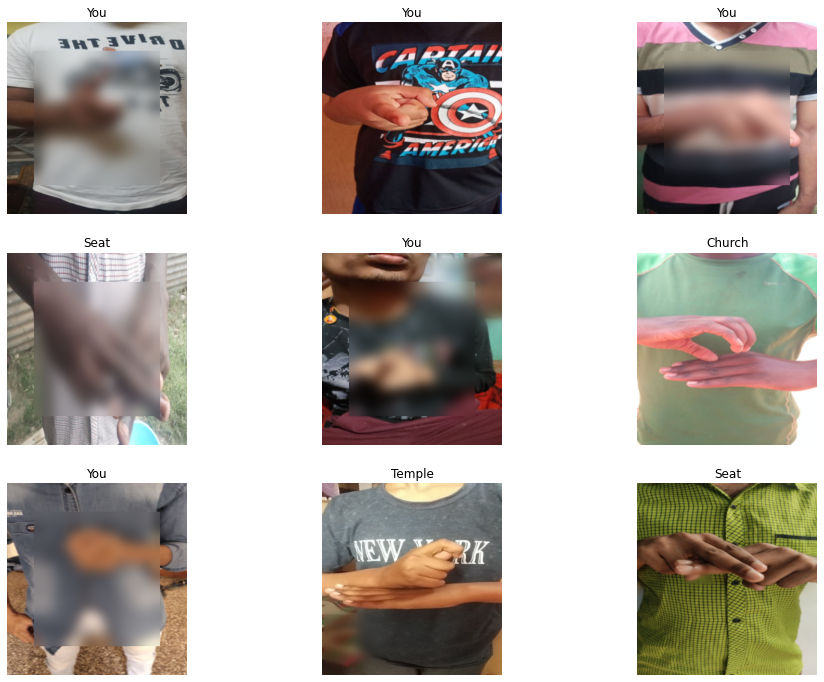

In [18]:
dataloaders, test_batch_gen = create_dataloaders(train=train, test=test,
                                        val_size=0.25,
                                        random_state=random_state,
                                        images_dir_train=path_train,
                                        images_dir_test=path_test,
                                        batch_size=batch_size, 
                                        labels_dict_copy=labels_dict_inversed)

plot_with_labels(dataloaders['train'], n_plots=9, labels_dict=labels_dict)

In [19]:
criterion = nn.CrossEntropyLoss()

In [20]:
# early stopping class
class EarlyStop:
    def __init__(self, patience=5, verbose=False,
                fname='checkpoint.pt'):
        """
        Stops trainig if validation loss doesn't increasing at given patience
        
        Args:
            patience (int): How long to wait until validaion loss increases.
                            Default: 5
            verbose (bool): If True, message of loss improvementis printed. 
                            Default: False
        """
        self.patience = patience
        self.verbose = verbose
        self.fname = os.path.join('Zindi_signs/', fname)
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.last_val_loss = np.Inf
        

    def __call__(self, val_loss, model):

        if self.best_score is None:
            self.best_score = val_loss
            self.save_checkpoint(val_loss, model)
            
        elif val_loss > self.best_score:
            self.counter += 1
            print(f'EarlyStop epoch: #{self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.last_val_loss:.6f} --> {val_loss:.6f}).  Saving model ...')
        self.last_val_loss = val_loss
        torch.save(model.state_dict(), os.path.join(path_start, self.fname))
        


In [21]:
def model_train(dataloaders, model, lr, num_epochs, criterion, batch_size=2, patience=None,
                fname='checkpoint.pt'):
    model = model.to(device)
    parameters = [param for param in model.parameters() if param.requires_grad] 
    optimizer = optim.Adam(model.parameters(), lr=lr)
    # Decay LR by a factor of 0.5 every 6 epochs
    exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.5)
    if patience != None:
        early_stop = EarlyStop(patience,verbose = True, fname=fname)
    for epoch in range(num_epochs):
        for stage in dataloaders.keys():
            if stage =='train':
                model.train()
            else:
                model.eval()
            current_corrects = 0.0
            current_loss = 0.0
            for images, labels in tqdm(dataloaders[stage]):
                images = images.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                out = model(images)
                loss = criterion(out, labels)
                
                _, preds = torch.max(out, 1)
                
                current_corrects = current_corrects + torch.sum(preds == labels.data)
                current_loss += loss.item() * images.size(0)
                if stage =='train':
                    loss.backward()
                    optimizer.step()
                    epoch_acc = current_corrects.double()/(len(dataloaders[stage])*batch_size)
            epoch_loss = current_loss/len(dataloaders[stage].dataset)
            print('Stage: {}, epoch:  {}, loss: {:.4f}, accuracy: {:.4f}'.format(stage, epoch,epoch_loss, epoch_acc))
            
            torch.cuda.empty_cache()

            if(stage == 'val'):
                early_stop(epoch_loss,model)      
            print(early_stop.early_stop)
            #if stage =='train':
            exp_lr_scheduler.step()
            print(exp_lr_scheduler.get_last_lr())
        if(early_stop.early_stop):
            print("Early stopping")
            fname = os.path.join('Zindi_signs/', fname)
            model.load_state_dict(torch.load(os.path.join(path_start, fname)))
            print('{} Accuracy: '.format(stage), epoch_acc.item())
            break
        print('{} Accuracy: '.format(stage), epoch_acc.item())
    return model
                
                
                
    

In [22]:
reg_net = models.regnet_x_8gf(pretrained=True)
in_features = reg_net.fc.in_features
reg_net.fc = nn.Linear(in_features, n_classes)

In [23]:
convnext = models.convnext_base(pretrained=True)
in_features = convnext.classifier[2].in_features
convnext.classifier[2] = nn.Linear(in_features, n_classes)

In [24]:
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
in_features = resnext50_32x4d.fc.in_features
resnext50_32x4d.fc = nn.Linear(in_features, n_classes)

In [25]:
effnet = models.efficientnet_b3(pretrained=True) 
in_features = effnet.classifier[1].in_features
effnet.classifier[1] = nn.Linear(in_features, n_classes)


In [26]:
models_list = [reg_net, convnext, effnet]

In [ ]:
ans_list = []

for model in models_list:
    # dataframe for submission
    submission = sample_submission.copy()
    
    dataloaders, test_batch_gen = create_dataloaders(train=train, test=test,
                                        val_size=0.25,
                                        random_state=random_state,
                                        images_dir_train=path_train,
                                        images_dir_test=path_test,
                                        batch_size=batch_size, 
                                        labels_dict_copy=labels_dict_inversed)
    #train model
    print("Training model ", model.__class__.__name__)
    fname = model.__class__.__name__ + '.pt'
    model = model_train(dataloaders=dataloaders, model=model, lr=0.00001, num_epochs=50,
                        criterion=criterion, patience=7, batch_size=batch_size,
                        fname=fname)
    model.eval()
    sm = nn.Softmax(dim = 1)
    for images, names in tqdm(test_batch_gen):
        images = images.to(device)
        output = model(images)
        output = sm(output)
        for name, ans in zip(names[0],output.detach().cpu().numpy()):
            submission.loc[sample_submission.img_IDS==name, sample_submission.columns[1:]] = ans
    submission.to_csv(os.path.join(path_start,'Zindi_signs/subm9'+ model.__class__.__name__  + '.csv'), index=False)
    ans_list.append(submission.copy())
    
    # memory cleaning        
    del(model, dataloaders, test_batch_gen)
    gc.collect()
    torch.cuda.empty_cache()
    

Training model  RegNet


  0%|          | 0/380 [00:00<?, ?it/s]

In [ ]:
sample_submission.iloc[:,1:] = pd.concat([ans_list[0], ans_list[1], ans_list[2]]).groupby(level=0).mean()

In [ ]:
sample_submission.to_csv(os.path.join(path_start,'Zindi_signs/3_combined.csv'), index=False)